In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Metazygia monitor 1.csv")
#df = df[6904:]
df2 = df[:6904]

min_day=1440
total_time = len(df.index)
num_days = total_time//min_day

df = df.drop(['Monitor 1 Spider 12','Monitor 1 Spider 13', 'Monitor 1 Spider 14', 'Monitor 1 Spider 17', 
              'Monitor 1 Spider 22', 'Monitor 1 Spider 23', 'Monitor 1 Spider 24'] , axis = 1)
df2 = df2.drop(['Monitor 1 Spider 12', 'Monitor 1 Spider 14', 'Monitor 1 Spider 17', 
              'Monitor 1 Spider 22', 'Monitor 1 Spider 23', 'Monitor 1 Spider 24'] , axis = 1)
#display(df.head())

/var/folders/1l/40_dq8x51d35gn3vd7ff778r0000gn/T/ipykernel_40213/4233250451.py:14: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/Users/schuylerclark/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


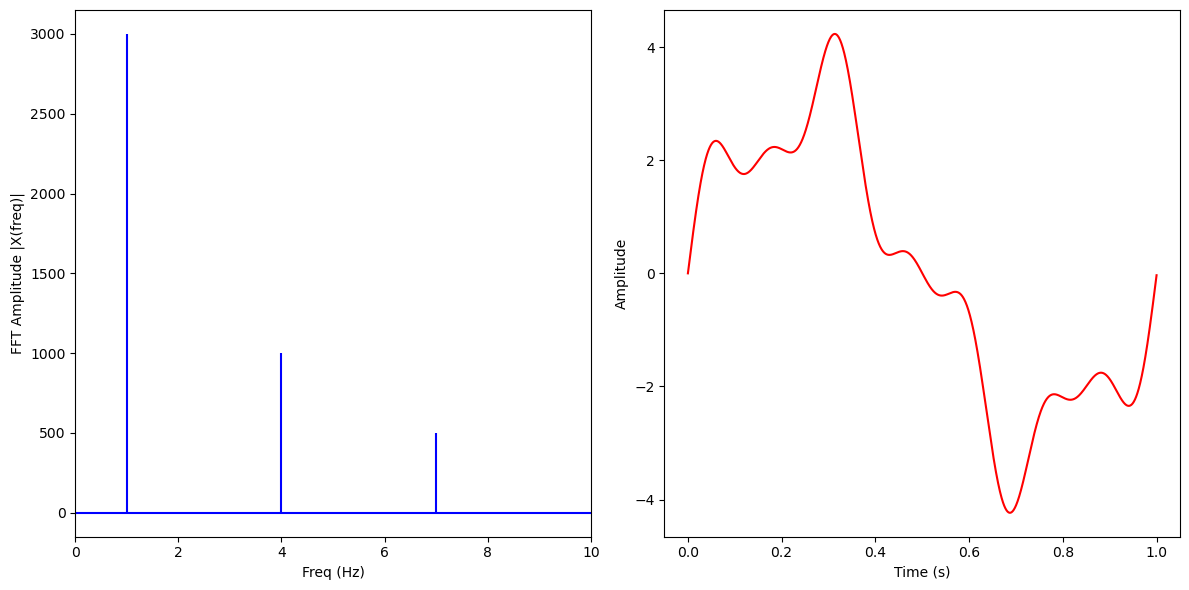

In [450]:
from scipy.fftpack import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [353]:
def LDandDD(df):
    #Run for loop to check the light activity of each day
    for i in range(0,num_days):
        dfnew=df[min_day*(i):min_day*(i+1)]
        dfnew=dfnew.reset_index(drop=True)
        #Find the first day of the DD cycle. This is where we will split the 
        #DataFrame
        if np.mean(dfnew.lights)==0:
            end=min_day*i
            break
    LDdf=df.iloc[:end]
    DDdf=df.iloc[end:]
    return LDdf, DDdf

LDdf, DDdf = LDandDD(df)
#display(DDdf)

In [396]:
def find_period(data, time_step):
    # Perform FFT
    fft_data = fft(data)
    power_spectrum = np.abs(fft_data) ** 2

    # Get frequency axis
    freqs = fftfreq(len(data), time_step)
    period = 1 / freqs[np.argmax(power_spectrum[1:]) + 1]  # Find the dominant peak

    return period

# Example usage
data = [1, 2, 3, 2, 1, -1, -2, -1, 0, 1, 2, 1]  # Sample data
time_step = 1  # Time step in hours (e.g., 1 minute = 1/60 hour)

# Generate cosine data with a period of 24 hours
num_samples = 1440  # Assuming 1 sample per minute for 24 hours
time = np.linspace(0, cos_period, num_samples, endpoint=False)
cos_data = np.cos(2 * np.pi * time / cos_period)

# Calculate the period of the data using the find_period function
data_period = find_period(DDdf['Monitor 1 Spider 1'], time_step)
data_period /= 60

print(f"The period of the data is {data_period} hours.")

The period of the data is 11.36842105263158 hours.


In [419]:
# Calculate the period for each spider
for spider_column in spider_columns:
    # Get the locomotor activity data for the spider
    activity_data = DDdf[spider_column].values
    
    # Apply rolling average with a window of 60 minutes
    rolling_avg = pd.Series(activity_data).rolling(window=60).mean()
    
    # Replace NaN or inf values with zeros
    rolling_avg = np.nan_to_num(rolling_avg, nan=0.0, posinf=0.0, neginf=0.0)
    
    # Detrend the rolling average data to remove constant or linear trends
    detrended_data = detrend(rolling_avg)
    
    # Perform Fourier transform on the detrended data
    fourier_transform = np.fft.fft(detrended_data)
    
    # Get the sampling rate (assuming one sample per minute)
    sampling_rate = 1
    
    # Calculate the frequency resolution
    frequency_resolution = sampling_rate / len(detrended_data)
    
    # Find the dominant frequency (corresponding to the period) using the maximum amplitude
    dominant_frequency_index = np.argmax(np.abs(fourier_transform[1:len(fourier_transform)//2])) + 1
    
    # Calculate the exact dominant frequency
    dominant_frequency = (dominant_frequency_index - 1) * frequency_resolution
    
    # Calculate the period in minutes
    period_minutes = len(DDdf) / dominant_frequency_index
    
    # Convert period to hours
    period_hours = period_minutes / 60
    
    # Print the period for the spider with decimal precision
    print(f"Spider {spider_column}: Period = {period_hours} hours")

Spider Monitor 1 Spider 1: Period = 11.368421052631579 hours
Spider Monitor 1 Spider 2: Period = 21.6 hours
Spider Monitor 1 Spider 3: Period = 24.0 hours
Spider Monitor 1 Spider 4: Period = 4.909090909090909 hours
Spider Monitor 1 Spider 5: Period = 7.7142857142857135 hours
Spider Monitor 1 Spider 6: Period = 7.448275862068965 hours
Spider Monitor 1 Spider 7: Period = 5.142857142857142 hours
Spider Monitor 1 Spider 8: Period = 24.0 hours
Spider Monitor 1 Spider 9: Period = 24.0 hours
Spider Monitor 1 Spider 10: Period = 12.0 hours
Spider Monitor 1 Spider 11: Period = 8.0 hours
Spider Monitor 1 Spider 15: Period = 21.6 hours
Spider Monitor 1 Spider 16: Period = 21.6 hours
Spider Monitor 1 Spider 18: Period = 21.6 hours
Spider Monitor 1 Spider 19: Period = 13.5 hours
Spider Monitor 1 Spider 20: Period = 11.368421052631579 hours
Spider Monitor 1 Spider 21: Period = 11.368421052631579 hours
Spider Monitor 1 Spider 25: Period = 12.0 hours
Spider Monitor 1 Spider 26: Period = 24.0 hours
Spi

In [411]:
from scipy.signal import detrend

period = 60 * 1

# Extract the spider columns (assuming they are named as col1, col2, ..., col32)
spider_columns = DDdf.columns[2:]

# Calculate the period for each spider
for spider_column in spider_columns:
    # Get the locomotor activity data for the spider
    activity_data = DDdf[spider_column].values
    
    
    # Apply rolling average with a window of 60 minutes
    rolling_avg = pd.Series(activity_data).rolling(window=60).mean()
    
    # Replace NaN or inf values with zeros
    rolling_avg = np.nan_to_num(rolling_avg, nan=0.0, posinf=0.0, neginf=0.0)
    
    # Detrend the rolling average data to remove constant or linear trends
    detrended_data = detrend(rolling_avg)
    
     # Perform Fourier transform on the detrended data
    fourier_transform = np.fft.fft(rolling_avg)
    
    # Get the sampling rate (assuming one sample per minute)
    sampling_rate = 1
    
    # Calculate the frequency resolution
    frequency_resolution = sampling_rate / len(rolling_avg)
    
    # Find the dominant frequency (corresponding to the period) using the maximum amplitude
    dominant_frequency_index = np.argmax(np.abs(fourier_transform[1:len(fourier_transform)//2])) + 1
    
    # Calculate the exact dominant frequency
    dominant_frequency = (dominant_frequency_index - 1) * frequency_resolution
    
    # Calculate the period in minutes
    period_minutes = len(DDdf) / dominant_frequency_index
    
    # Convert period to hours
    period_hours = period_minutes / 60
    
    # Print the period for the spider with decimal precision
    print(f"Spider {spider_column}: Period = {period_hours} hours")

Spider Monitor 1 Spider 1: Period = 11.368421052631579 hours
Spider Monitor 1 Spider 2: Period = 21.6 hours
Spider Monitor 1 Spider 3: Period = 24.0 hours
Spider Monitor 1 Spider 4: Period = 4.909090909090909 hours
Spider Monitor 1 Spider 5: Period = 7.7142857142857135 hours
Spider Monitor 1 Spider 6: Period = 7.448275862068965 hours
Spider Monitor 1 Spider 7: Period = 5.142857142857142 hours
Spider Monitor 1 Spider 8: Period = 24.0 hours
Spider Monitor 1 Spider 9: Period = 24.0 hours
Spider Monitor 1 Spider 10: Period = 12.0 hours
Spider Monitor 1 Spider 11: Period = 8.0 hours
Spider Monitor 1 Spider 15: Period = 11.368421052631579 hours
Spider Monitor 1 Spider 16: Period = 21.6 hours
Spider Monitor 1 Spider 18: Period = 21.6 hours
Spider Monitor 1 Spider 19: Period = 13.5 hours
Spider Monitor 1 Spider 20: Period = 11.368421052631579 hours
Spider Monitor 1 Spider 21: Period = 11.368421052631579 hours
Spider Monitor 1 Spider 25: Period = 12.0 hours
Spider Monitor 1 Spider 26: Period = 

In [326]:
time_col = df2.columns[0]  # Assuming the first column contains the date/time index

# Convert date/time column to numerical representation
time = pd.to_datetime(DDdf[time_col]).astype(int) // 10**9  # Convert to UNIX timestamp in seconds
time /= 60 #convert to minutes


# Extract the spider columns (assuming they are named as col1, col2, ..., col32)
spider_columns = df.columns[2:]

# Define the minimum duration for activity to be considered significant (in minutes)
significant_duration_threshold = 30

# Define the minimum duration of inactivity to reset the significant period calculation (in minutes)
inactivity_reset_threshold = 60

# Calculate the significant activity periods for each spider
for spider_column in spider_columns:
    # Get the locomotor activity data for the spider
    activity_data = df[spider_column].values
    
    # Find the indices where activity crosses the threshold (indicating significant activity)
    significant_indices = np.where(activity_data > 0)[0]
    
    # Initialize variables for tracking the significant activity periods
    significant_periods = []
    start_time = None
    previous_index = None
    
    # Iterate through the significant indices
    for index in significant_indices:
        if pd.isnull(start_time):
            # Start a new significant period
            start_time = time[index]
        elif previous_index is not None and (index - previous_index) > inactivity_reset_threshold:
            # If there was a significant inactivity period, reset the start time
            start_time = time[index]
        
        previous_index = index
        
        # Check if the current period duration exceeds the threshold
        current_duration = (time[index] - start_time).total_seconds() / 60
        if current_duration >= significant_duration_threshold:
            # Add the significant period to the list
            significant_periods.append((start_time, time[index]))
            start_time = None
    
    # Calculate the time intervals between significant periods
    time_intervals = [str((period[1] - period[0]).total_seconds() / 60) for period in significant_periods]
    
    # Print the results for the spider
    print(f"Spider {spider_column}:")
    print("Significant periods:")
    for period in significant_periods:
        print(f"Start: {period[0]}, End: {period[1]}")
    print("Time intervals between significant periods:")
    print(", ".join(time_intervals))
    print()

KeyError: 166

In [335]:
from datetime import datetime, timedelta

In [346]:


# Extract the spider columns (assuming they are named as col1, col2, ..., col32)
spider_columns = df.columns[2:]

# Define the minimum duration for activity to be considered significant (in minutes)
significant_duration_threshold = 15

# Define the minimum duration of inactivity to reset the significant period calculation (in minutes)
inactivity_reset_threshold = 600

# Convert "Date_Time" column to datetime objects
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Initialize a dictionary to store the start times of significant periods for each spider
start_times = {spider: [] for spider in spider_columns}

# Calculate the significant activity periods for each spider
for spider_column in spider_columns:
    # Get the locomotor activity data for the spider
    activity_data = df[spider_column].values
    
    # Find the indices where activity crosses the threshold (indicating significant activity)
    significant_indices = np.where(activity_data > 2)[0]
    
    # Initialize variables for tracking the significant activity periods
    start_time = None
    previous_index = None
    
    # Iterate through the significant indices
    for index in significant_indices:
        if pd.isnull(start_time):
            # Start a new significant period
            start_time = df['Date_Time'][index]
        elif previous_index is not None and (index - previous_index) > inactivity_reset_threshold:
            # If there was a significant inactivity period, reset the start time
            start_time = df['Date_Time'][index]
        
        previous_index = index
        
        # Check if the current period duration exceeds the threshold
        current_duration = (df['Date_Time'][index] - start_time).total_seconds() / 60
        if current_duration >= significant_duration_threshold:
            # Add the start time to the list for the spider
            start_times[spider_column].append(start_time)
            start_time = None

# Calculate and print the average interval between start times for each spider
for spider_column, start_times_list in start_times.items():
    if len(start_times_list) > 1:
        # Calculate the time intervals between start times
        time_intervals = [start_times_list[i + 1] - start_times_list[i] for i in range(len(start_times_list) - 1)]
        
        # Calculate the average interval in hours
        average_interval = sum(time_intervals, timedelta()) / len(time_intervals)
        average_interval_hours = average_interval.total_seconds() / 3600
        
        # Print the results for the spider
        print(f"Spider {spider_column}:")
        print(f"Average interval between start times: {average_interval_hours:.3f} hours")
        print()
    else:
        print(f"Spider {spider_column}:")
        print("Not enough significant periods for calculation.")
        print()

Spider Monitor 1 Spider 1:
Average interval between start times: 1.843 hours

Spider Monitor 1 Spider 2:
Average interval between start times: 1.340 hours

Spider Monitor 1 Spider 3:
Average interval between start times: 1.296 hours

Spider Monitor 1 Spider 4:
Average interval between start times: 1.521 hours

Spider Monitor 1 Spider 5:
Average interval between start times: 1.957 hours

Spider Monitor 1 Spider 6:
Average interval between start times: 1.506 hours

Spider Monitor 1 Spider 7:
Average interval between start times: 1.921 hours

Spider Monitor 1 Spider 8:
Average interval between start times: 3.318 hours

Spider Monitor 1 Spider 9:
Average interval between start times: 1.876 hours

Spider Monitor 1 Spider 10:
Average interval between start times: 3.100 hours

Spider Monitor 1 Spider 11:
Average interval between start times: 4.072 hours

Spider Monitor 1 Spider 15:
Average interval between start times: 4.892 hours

Spider Monitor 1 Spider 16:
Average interval between start ti

In [163]:
import pandas as pd
import numpy as np
from astropy.stats import LombScargle


time_col = df.columns[0]  # Assuming the first column contains the date/time index
spider_cols = df.columns[2:]  # Assuming spider columns start from the second column

# Convert date/time column to numerical representation
time = pd.to_datetime(df[time_col]).astype(int) // 10**9  # Convert to UNIX timestamp in seconds
time *= 60 #convert to minutes
# Calculate the free-running period for each spider
for spider_col in spider_cols:
    activity = df[spider_col].rolling(window=20).mean()
    # Filter out zeros from the activity data
    nonzero_indices = activity != 0
    filtered_time = time[nonzero_indices]
    filtered_activity = activity[nonzero_indices]

    if len(filtered_activity) > 0:
        frequency, power = LombScargle(time, activity).autopower()

        # Find the highest peak in the periodogram
        period_minutes = 1 / frequency[np.argmax(power)]
        period_hours = period_minutes / 60

        print(f"Spider {spider_col}: Free-running period = {period_hours:.2f} hours")
        maximum = max(frequency)
        #print(maximum)
        #print(spider_col, 'Free Running Period:',1/ (maximum * 60 * 9), 'hours')
        #plt.plot(frequency, power)
        
        
    else:
        print(f"Spider {spider_col}: No nonzero activity data found")

Spider Monitor 1 Spider 1: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 2: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 3: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 4: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 5: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 6: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 7: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 8: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 9: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 10: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 11: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 15: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 16: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 18: Free-running period = 7953000.00 hours
Spider Monitor 1 Spider 19: Free-running period = 7953000.00 hours
Spid

In [152]:
time_col = df2.columns[0]  # Assuming the first column contains the date/time index
spider_cols = df2.columns[2:]  # Assuming spider columns start from the second column

# Convert date/time column to numerical representation
time = pd.to_datetime(df2[time_col]).astype(int) // 10**9  # Convert to UNIX timestamp in seconds
time *= 60 #convert to minutes
# Calculate the free-running period for each spider
for spider_col in spider_cols:
    activity = df2[spider_col].values
    # Filter out zeros from the activity data
    nonzero_indices = activity != 0
    filtered_time = time[nonzero_indices]
    filtered_activity = activity[nonzero_indices]

    if len(filtered_activity) > 0:
        frequency, power = LombScargle(filtered_time, filtered_activity).autopower()

        # Find the highest peak in the periodogram
        period_minutes = 1 / frequency[np.argmax(power)]
        period_hours = period_minutes / 60

        #print(f"Spider {spider_col}: Free-running period = {period_hours:.2f} hours")
        maximum = max(frequency)
        #print(maximum)
        print(spider_col, 'Free Running Period:',1/ (maximum * 60 * 9), 'hours')
        #plt.plot(frequency, power)
        
        
    else:
        print(f"Spider {spider_col}: No nonzero activity data found")

Monitor 1 Spider 1 Free Running Period: 17.40497103818903 hours
Monitor 1 Spider 2 Free Running Period: 14.834517356317972 hours
Monitor 1 Spider 3 Free Running Period: 16.15713866901202 hours
Monitor 1 Spider 4 Free Running Period: 22.480139726181754 hours
Monitor 1 Spider 5 Free Running Period: 22.146471371504663 hours
Monitor 1 Spider 6 Free Running Period: 16.276018580901386 hours
Monitor 1 Spider 7 Free Running Period: 23.26471833968657 hours
Monitor 1 Spider 8 Free Running Period: 31.724137931034484 hours
Monitor 1 Spider 9 Free Running Period: 20.840412277721143 hours
Monitor 1 Spider 10 Free Running Period: 25.824561403508774 hours
Monitor 1 Spider 11 Free Running Period: 36.61338260101213 hours
Monitor 1 Spider 13 Free Running Period: 55.42520612485276 hours
Monitor 1 Spider 15 Free Running Period: 35.73474801061008 hours
Monitor 1 Spider 16 Free Running Period: 33.38452163315052 hours
Monitor 1 Spider 18 Free Running Period: 24.179183135704875 hours
Monitor 1 Spider 19 Free R